In [3]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Step 1. Load the dataset
# Credits:  California Cooperative Oceanic Fisheries Investigations
# URL: https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv
# Drescription: The CalCOFI data set represents the longest (1949-present) 
# and most complete (more than 50,000 sampling stations) time series of 
# oceanographic and larval fish data in the world. It includes abundance 
# data on the larvae of over 250 species of fish; larval length frequency 
# data and egg abundance data on key commercial species; and oceanographic 
# and plankton data. The physical, chemical, and biological data collected 
# at regular time and space intervals quickly became valuable for 
# documenting climatic cycles in the California Current and a range of 
# biological responses to them. 
df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv',index_col=0)

In [7]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [ ]:
# 1.2 Take a sample

In [ ]:
# 1.3 Transform if needed
# - variables categoricas o variables fechas
#

In [9]:
# Step 2. Make a basic EDA
df = df_raw.copy()

In [12]:
# 2.1 Split the dataset so to avoid bias
X = df["Salnty"]
y = df["T_degC"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40, test_size=0.25)
# El EDA se hace despues del split sobre X_train y y_train

In [15]:
# 2.2 Join the train sets to ease insights
df_train =pd.DataFrame({'Salinity': X_train,'Temp':y_train})

In [16]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 243 to 219
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salinity  225 non-null    float64
 1   Temp      225 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


In [19]:
# 2.4 Take a sample
df_train.sample(5)

,Salinity,Temp
229,33.957,5.95
235,34.180,4.89
116,32.740,10.47
26,33.800,5.12
76,34.420,2.78


In [21]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,Salinity,Temp
count,225.000000,225.000000
mean,33.605831,7.937244
std,0.559792,2.996976
min,32.630000,2.780000
25%,33.000000,5.020000
50%,33.800000,8.180000
75%,34.101000,10.470000
max,34.430000,12.660000


In [ ]:
# 2.6 Describe the categorical variables
#value_counts sobre las variables categoricas
#pasar a numeros cada una 

array([[<AxesSubplot:title={'center':'Salinity'}>,
        <AxesSubplot:title={'center':'Temp'}>]], dtype=object)

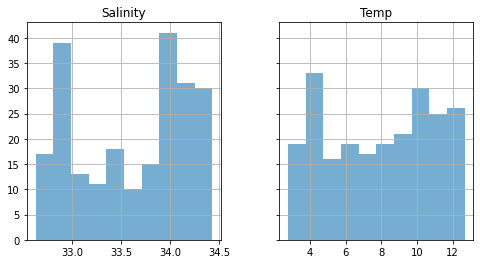

In [25]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize=(8,4),sharey=True,alpha=0.6)

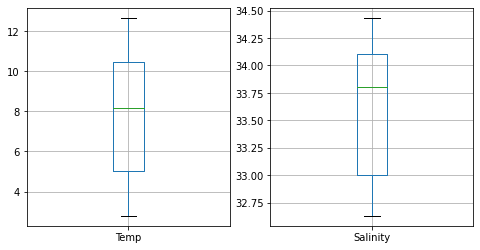

In [29]:
# 2.8 Perform univariate analysis - boxplots
fig,axs = plt.subplots(1,2,figsize=(8,4))
df_train[["Temp"]].boxplot(ax=axs[0])
df_train[["Salinity"]].boxplot(ax=axs[1])
plt.show()

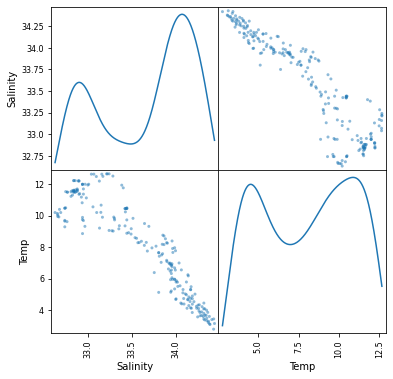

In [32]:
# 2.9 Perform bivariate analysis - scatter matrix
pd.plotting.scatter_matrix(df_train,diagonal='kde',figsize=(6,6))
plt.show()
#abajo esta Salinity x Salinity y Temp x Temp: muestra la grafica asi porque como es 'kde' muestra la distribucion, en vez de la recta x

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
# como tengo solo una varialble, no puedo hacer este analisis

In [ ]:
# 2.11 Perform multivariate analysis - VIF
# como tengo solo una varialble, no puedo hacer este analisis

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals

#Goal: Pronosticar la Salinity en base a la Temperatura (o al revez, no me acuerdo) utilizado modelos de training

In [38]:
# 3.1 Perform model fit - A
#Modelo de sklearn:
sklm = LinearRegression() #Crea el objeto 
sklm.fit(X_train.to_frame(),y_train)#Cuando es solamente una variable predictora, el sklearn interpreta a X_train como una lista, no como un dataframe, toma una lista "acostada" entonces tenemos que orientarlo usando to_fram() SOLO CUANDO ES UNA PREDICTORA, con y_train no es necesario hacerlo
score = sklm.score(X_train.to_frame(),y_train)#score R^2 : proportion if the variance in DV explained by IV
print(f'score is {score: .4f}') # score R^2 sobre el dataset de aprendizaje

score is  0.8454


In [39]:
predictions = sklm.predict(X_test.to_frame())
print(f'The R2 score is: {r2_score(y_test,predictions)}')# score R^2 sobre el dataset de test
print(f'The RMSE is: {mean_squared_error(y_test,predictions,squared=False)}') # estudiar que es

The R2 score is: 0.7863151702808187
The RMSE is: 1.316206920253402


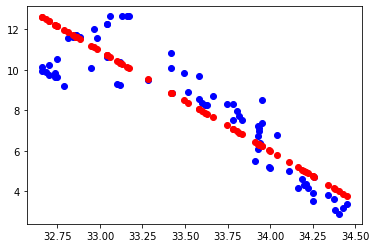

In [41]:
#Vizualizar predicciones (Rojo) contra los valores reales (Blue )
plt.scatter(x=X_test,y=y_test,color='Blue')
plt.scatter(x=X_test,y=predictions,color='Red')
plt.show()

In [44]:
# 3.2 Perform model fit - B Es el mismo modelo pero usando smf
results = smf.ols('Temp ~ Salinity', data=df_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-92
Time:                        22:18:26   Log-Likelihood:                -355.70
No. Observations:                 225   AIC:                             715.4
Df Residuals:                     223   BIC:                             722.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.3618      4.738     36.590      0.0

In [46]:
# 3.3 Calculate metrics on model A
#las calculamos arriba

print(f'score is R2 (based on the test dataset) {score: .4f}') # score R^2 sobre el dataset de training
print(f'The R2 score  is : {r2_score(y_test,predictions)}')# score R^2 sobre el dataset de testing
print(f'The RMSE is: {mean_squared_error(y_test,predictions,squared=False)}') # estudiar que es

score is R2 (based on the test dataset)  0.8454
The R2 score  is : 0.7863151702808187
The RMSE is: 1.316206920253402


In [47]:
# 3.4 Calculate metrics on model B
#las calculamos arriba
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1219.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.31e-92
Time:                        22:30:16   Log-Likelihood:                -355.70
No. Observations:                 225   AIC:                             715.4
Df Residuals:                     223   BIC:                             722.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.3618      4.738     36.590      0.0

In [ ]:
# Step 4. Write up your conclusions